In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mikeio

In [ ]:
da = mikeio.read('../tests/testdata/spectra/pt_spectra.dfsu')[0]
da

<mikeio.DataArray>
name: Point 1: Energy density
dims: (time:31, direction:16, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (31 records)
geometry: Point Spectrum Geometry(frequency:25, direction:16)

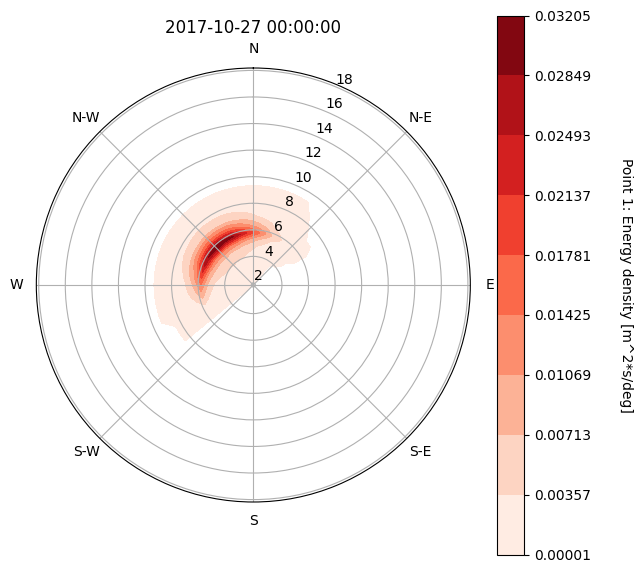

In [ ]:
da.plot() # plots first timestep by default

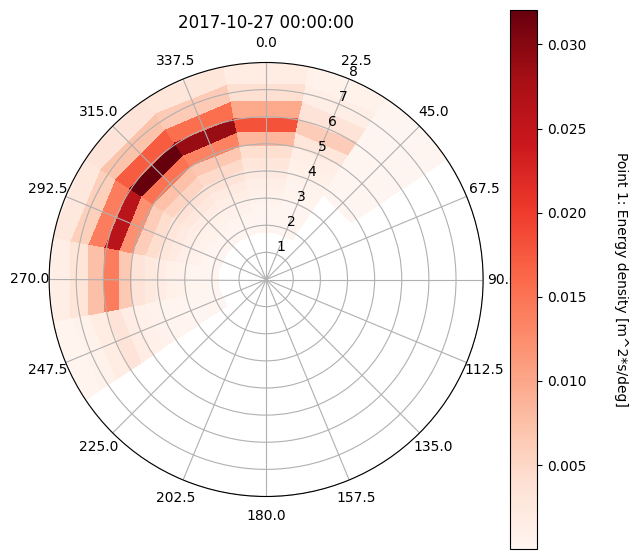

In [ ]:
ax = da.plot.patch(rmax=8)
dird = np.round(da.directions, 2)
ax.set_thetagrids(dird, labels=dird)
ax

In [ ]:
da_1 = mikeio.read('../tests/testdata/spectra/line_spectra.dfsu').Energy_density
da_1

<mikeio.DataArray>
name: Energy density
dims: (time:4, node:10, direction:16, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (4 records)
geometry: DfsuSpectral1D (9 elements, 10 nodes)

In [ ]:
spec = da_1[0].isel(node=3)
spec

<mikeio.DataArray>
name: Energy density
dims: (direction:16, frequency:25)
time: 2017-10-27 00:00:00 (time-invariant)
geometry: Point Spectrum Geometry(frequency:25, direction:16, x:1.89843, y:51.69084)

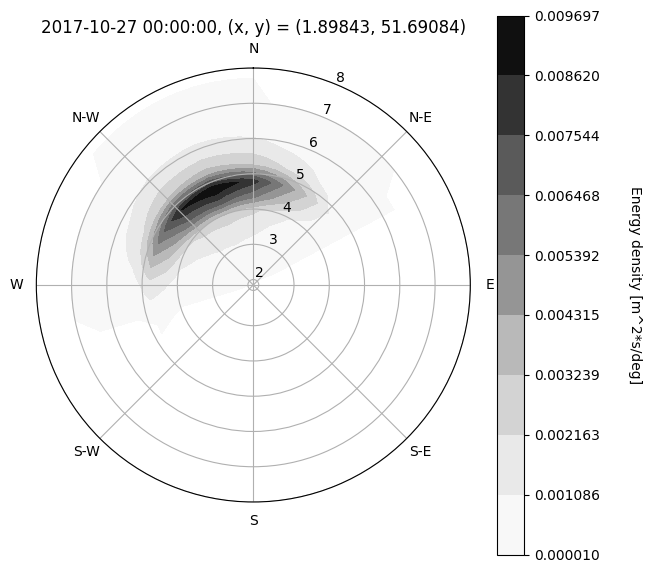

In [ ]:
spec.plot(cmap="Greys", rmax=8, r_as_periods=True)

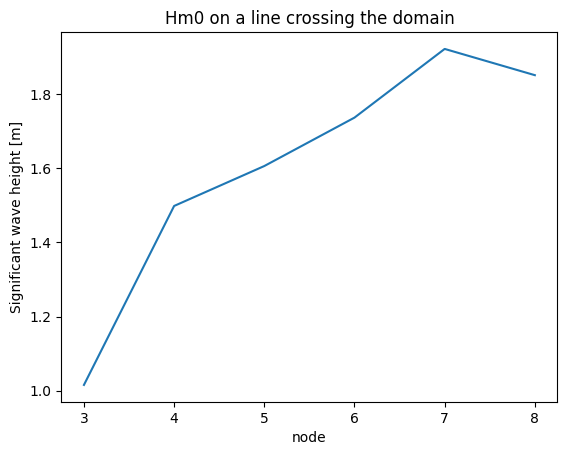

In [ ]:
Hm0 = da_1.isel(time=0).to_Hm0()
Hm0.plot(title='Hm0 on a line crossing the domain')

In [ ]:
da_2 = mikeio.read('../tests/testdata/spectra/area_spectra.dfsu', items='Energy density')[0]
da_2

<mikeio.DataArray>
name: Energy density
dims: (time:3, element:40, direction:16, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (3 records)
geometry: DfsuSpectral2D (40 elements, 33 nodes)

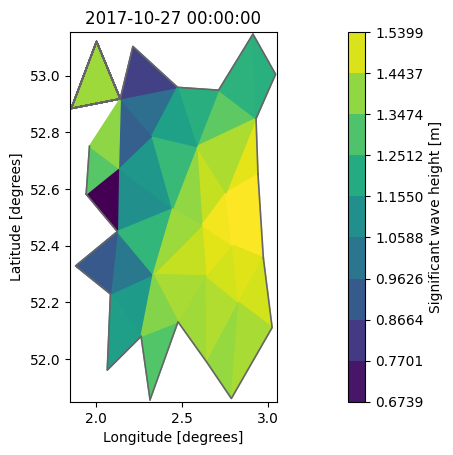

In [ ]:
da_2.plot()

In [ ]:
da_pt = da_2.sel(x=2.9, y=52.5)
da_pt

<mikeio.DataArray>
name: Energy density
dims: (time:3, direction:16, frequency:25)
time: 2017-10-27 00:00:00 - 2017-10-27 05:00:00 (3 records)
geometry: Point Spectrum Geometry(frequency:25, direction:16, x:2.90053, y:52.47039)

In [ ]:
da_pt.plot(rmax=9);

In [ ]:
from datetime import timedelta

In [ ]:
import marimo as mo

# Dfsu - spectral data

MIKE 21 SW can output full spectral information in points, along lines or in an area. In all these cases data are stored in dfsu files with additional axes: frequency and directions.

This notebook explores reading __full__ spectral dfsu files from MIKE 21 SW as

* point
* line
* area

## Read dfsu point spectrum

Don't like the default plot? No worries, it can be customized.

## Dfsu line spectrum

Data in dfsu line spectra is node-based contrary to must other dfsu-formats.

### Plot Hm0 on a line

## Dfsu area spectrum

### Interactive widget for exploring spectra in different points

In [ ]:
el = mo.ui.slider(start=0, stop=(da_2.geometry.n_elements -1), label="Element")
t = mo.ui.slider(start=0, stop=(da_2.n_timesteps -1), label="Time")
[el,t]

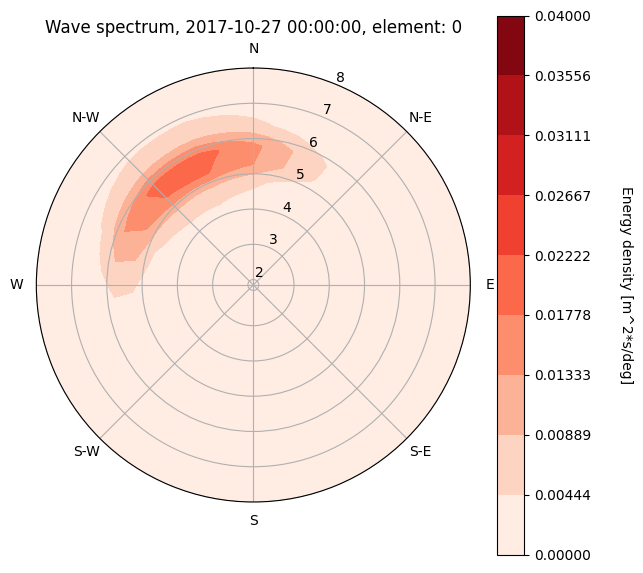

In [ ]:
id = el.value
step = t.value

dspec = da_2[step, id]
time = da_2.start_time + timedelta(seconds=step * da_2.timestep)
dspec.plot(vmax=0.04, vmin=0, rmax=8, title=f'Wave spectrum, {time}, element: {id}')